In [100]:
import pandas as pd
df=pd.read_csv('bitcon1.csv')
for i in range(1,6):
    df['lagr_'+str(i)]=df['Retur' \
                          'n'].shift(i)
df

,Date,Price,Open,High,Low,Amount,Return,lagr_1,lagr_2,lagr_3,lagr_4,lagr_5
0,2012/12/10,13.4,13.4,13.6,13.3,24.67,0.0000,NaN,NaN,NaN,NaN,NaN
1,2012/12/11,13.6,13.4,13.7,13.3,28.05,0.0097,0.0000,NaN,NaN,NaN,NaN
2,2012/12/12,13.7,13.6,13.8,13.3,37.68,0.0103,0.0097,0.0000,NaN,NaN,NaN
3,2012/12/13,13.7,13.7,13.8,13.5,24.20,0.0000,0.0103,0.0097,0.0000,NaN,NaN
4,2012/12/14,13.6,13.7,13.9,13,70.14,-0.0073,0.0000,0.0103,0.0097,0.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2022/12/6,"17,089.30","16,966.30","17,101.10","16,914.90",246.19,0.0072,-0.0085,0.0135,-0.0122,0.0072,-0.0112
3649,2022/12/7,"16,835.20","17,089.40","17,126.70","16,715.30",244.36,-0.0149,0.0072,-0.0085,0.0135,-0.0122,0.0072
3650,2022/12/8,"17,225.70","16,835.20","17,294.20","16,765.80",261.64,0.0232,-0.0149,0.0072,-0.0085,0.0135,-0.0122
3651,2022/12/9,"17,125.70","17,225.60","17,288.60","17,082.10",260.84,-0.0058,0.0232,-0.0149,0.0072,-0.0085,0.0135


In [101]:
import numpy as np

In [102]:
df.Date=pd.to_datetime(df.Date)
df

,Date,Price,Open,High,Low,Amount,Return,lagr_1,lagr_2,lagr_3,lagr_4,lagr_5
0,2012-12-10,13.4,13.4,13.6,13.3,24.67,0.0000,NaN,NaN,NaN,NaN,NaN
1,2012-12-11,13.6,13.4,13.7,13.3,28.05,0.0097,0.0000,NaN,NaN,NaN,NaN
2,2012-12-12,13.7,13.6,13.8,13.3,37.68,0.0103,0.0097,0.0000,NaN,NaN,NaN
3,2012-12-13,13.7,13.7,13.8,13.5,24.20,0.0000,0.0103,0.0097,0.0000,NaN,NaN
4,2012-12-14,13.6,13.7,13.9,13,70.14,-0.0073,0.0000,0.0103,0.0097,0.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2022-12-06,"17,089.30","16,966.30","17,101.10","16,914.90",246.19,0.0072,-0.0085,0.0135,-0.0122,0.0072,-0.0112
3649,2022-12-07,"16,835.20","17,089.40","17,126.70","16,715.30",244.36,-0.0149,0.0072,-0.0085,0.0135,-0.0122,0.0072
3650,2022-12-08,"17,225.70","16,835.20","17,294.20","16,765.80",261.64,0.0232,-0.0149,0.0072,-0.0085,0.0135,-0.0122
3651,2022-12-09,"17,125.70","17,225.60","17,288.60","17,082.10",260.84,-0.0058,0.0232,-0.0149,0.0072,-0.0085,0.0135


In [103]:
df.set_index('Date',inplace=True)

In [104]:
train_part=df.loc['2012-12-15':'2019-12-10',['Return','lagr_1','lagr_2','lagr_3','lagr_4','lagr_5']]
test_part=df.loc['2019-12-11':,['Return','lagr_1','lagr_2','lagr_3','lagr_4','lagr_5']]

In [105]:
train_part

,Return,lagr_1,lagr_2,lagr_3,lagr_4,lagr_5
Date,,,,,,
2012-12-15,-0.0081,-0.0073,0.0000,0.0103,0.0097,0.0000
2012-12-16,-0.0141,-0.0081,-0.0073,0.0000,0.0103,0.0097
2012-12-17,-0.0038,-0.0141,-0.0081,-0.0073,0.0000,0.0103
2012-12-18,0.0038,-0.0038,-0.0141,-0.0081,-0.0073,0.0000
2012-12-19,0.0226,0.0038,-0.0038,-0.0141,-0.0081,-0.0073
...,...,...,...,...,...,...
2019-12-06,0.0178,0.0270,-0.0120,-0.0009,-0.0133,-0.0199
2019-12-07,-0.0026,0.0178,0.0270,-0.0120,-0.0009,-0.0133
2019-12-08,0.0018,-0.0026,0.0178,0.0270,-0.0120,-0.0009


In [106]:
test_part

,Return,lagr_1,lagr_2,lagr_3,lagr_4,lagr_5
Date,,,,,,
2019-12-11,-0.0038,-0.0163,-0.0224,0.0018,-0.0026,0.0178
2019-12-12,0.0000,-0.0038,-0.0163,-0.0224,0.0018,-0.0026
2019-12-13,0.0065,0.0000,-0.0038,-0.0163,-0.0224,0.0018
2019-12-14,-0.0240,0.0065,0.0000,-0.0038,-0.0163,-0.0224
2019-12-15,0.0067,-0.0240,0.0065,0.0000,-0.0038,-0.0163
...,...,...,...,...,...,...
2022-12-06,0.0072,-0.0085,0.0135,-0.0122,0.0072,-0.0112
2022-12-07,-0.0149,0.0072,-0.0085,0.0135,-0.0122,0.0072
2022-12-08,0.0232,-0.0149,0.0072,-0.0085,0.0135,-0.0122


In [107]:
train_part=train_part.applymap(lambda x:x*10)
test_part=test_part.applymap(lambda x:x*10)

In [108]:
train_part
train_part.shape

(2552, 6)

In [109]:
X_train,Y_train=[],[]
for i in range(5,2552):
    X_train.append(train_part.iloc[i-5:i,1:])
    Y_train.append(train_part.iloc[i,:1])

X_train,Y_train=np.array(X_train),np.array(Y_train)

In [110]:
X_test,Y_test=[],[]
for i in range(5,1096):
    X_test.append(test_part.iloc[i-5:i,1:])
    Y_test.append(test_part.iloc[i,:1])

X_test,Y_test=np.array(X_test),np.array(Y_test)

In [111]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.models import load_model
from keras.layers import RepeatVector
import keras

In [112]:
X_train.shape[2]

5

In [113]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dense(16,kernel_initializer="uniform",activation='relu'))
model.add(Dense(1,kernel_initializer="uniform",activation='linear'))

adam = keras.optimizers.Adam(decay=0.2)

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5, 128)            68608     
                                                                 
 dense_6 (Dense)             (None, 5, 16)             2064      
                                                                 
 dense_7 (Dense)             (None, 5, 1)              17        
                                                                 
Total params: 70,689
Trainable params: 70,689
Non-trainable params: 0
_________________________________________________________________


In [114]:
# 训练模型
print(X_train.shape, Y_train.shape)
history = model.fit(X_train, Y_train, epochs=300, verbose=2, shuffle=False)
model.save("1-1.h5")

(2547, 5, 5) (2547, 1)
Epoch 1/300
80/80 - 2s - loss: 0.7532 - accuracy: 0.0082 - 2s/epoch - 19ms/step
Epoch 2/300
80/80 - 0s - loss: 0.7513 - accuracy: 0.0082 - 260ms/epoch - 3ms/step
Epoch 3/300
80/80 - 0s - loss: 0.7482 - accuracy: 0.0082 - 250ms/epoch - 3ms/step
Epoch 4/300
80/80 - 0s - loss: 0.7419 - accuracy: 0.0082 - 250ms/epoch - 3ms/step
Epoch 5/300
80/80 - 0s - loss: 0.7318 - accuracy: 0.0082 - 256ms/epoch - 3ms/step
Epoch 6/300
80/80 - 0s - loss: 0.7190 - accuracy: 0.0082 - 256ms/epoch - 3ms/step
Epoch 7/300
80/80 - 0s - loss: 0.7000 - accuracy: 0.0082 - 259ms/epoch - 3ms/step
Epoch 8/300
80/80 - 0s - loss: 0.6714 - accuracy: 0.0082 - 271ms/epoch - 3ms/step
Epoch 9/300
80/80 - 0s - loss: 0.6660 - accuracy: 0.0082 - 282ms/epoch - 4ms/step
Epoch 10/300
80/80 - 0s - loss: 0.6457 - accuracy: 0.0082 - 279ms/epoch - 3ms/step
Epoch 11/300
80/80 - 0s - loss: 0.5857 - accuracy: 0.0082 - 259ms/epoch - 3ms/step
Epoch 12/300
80/80 - 0s - loss: 0.5408 - accuracy: 0.0082 - 248ms/epoch - 3

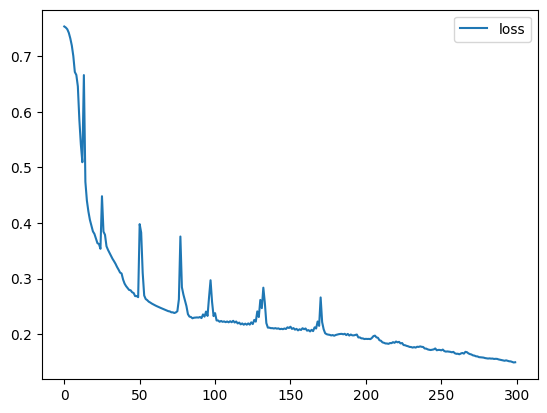

In [115]:
import matplotlib.pyplot as plt
# plot history
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.show()

35/35 [==============================] - 0s 2ms/step


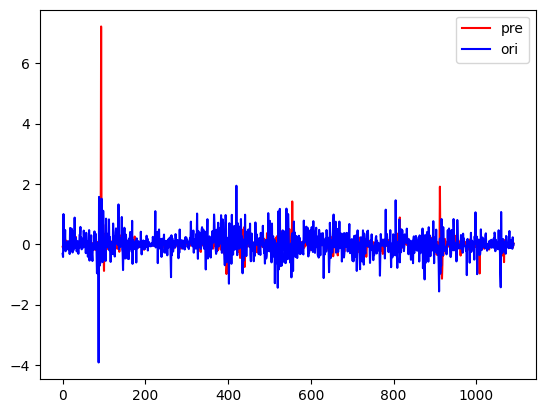

In [123]:
pre_test = model.predict(X_test)[:, -1, :]
pre_test = pre_test.reshape(pre_test.shape[0])

plt.plot(pre_test, label='pre', color='red')
plt.plot(Y_test, label='ori', color='blue')
plt.legend()
plt.show()

In [124]:
mse = np.mean(np.square(pre_test - Y_test))/100
print(mse)  # Output: 1.0

0.002287964498816092
